#Analisando dados de aluguéis no Rio de Janeiro

  

In [2]:
#importando as bibliotecas necessárias 

import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#lendo e imprimindo as primeiras 10 linhas

dados = pd.read_csv('aluguel.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


###Algumas informações gerais sobre a Base de dados

Quantas colunas/variáveis e quantas linhas/entradas possui a base de dados?

In [4]:
print('---- A base de dados apresenta ----')
print(f'Entradas: {dados.shape[0]}')
print(f'Variáveis: {dados.shape[1]}')

---- A base de dados apresenta ----
Entradas: 32960
Variáveis: 9


Quais são os tipos de dados (dtypes) das variáveis?


In [5]:
tipos_de_dados = pd.DataFrame(dados.dtypes, columns = ['Tipos de dados'])
tipos_de_dados.columns.name = 'Variáveis'
tipos_de_dados


Variáveis,Tipos de dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


Existe valores ausentes?

In [6]:
dados.isnull().values.any()

True

In [7]:
#quantidade de valores nulos nas variáveis

dados.isnull().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

Vamos remover os imóveis sem valores definidos

In [8]:
dados.dropna(subset = ['Valor'], inplace = True)

In [9]:
dados[dados['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


Verificando os Condimínios com valores nulos

In [10]:
dados[dados['Condominio'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32914,Loja/Salão,Campo Grande,0,0,0,160,2650.0,NaN,NaN
32928,Loja/Salão,Leblon,0,0,0,68,25000.0,NaN,1113.0
32929,Loja/Salão,Freguesia (Jacarepaguá),0,0,0,80,5800.0,NaN,215.0
32931,Casa,Centro,5,0,1,160,5000.0,NaN,80.0


Para uma melhor visualização iremos adicionar o valor 0 para os elementos faltantes em Condomínio e IPTU

In [11]:
dados = dados.fillna({'Condominio': 0, 'IPTU': 0})

In [12]:
dados.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

Quais são os tipos de imóveis existentes na base de dados?

In [13]:
dados['Tipo'].unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

Text(0.5, 1.0, 'Quantidade por imóvel')

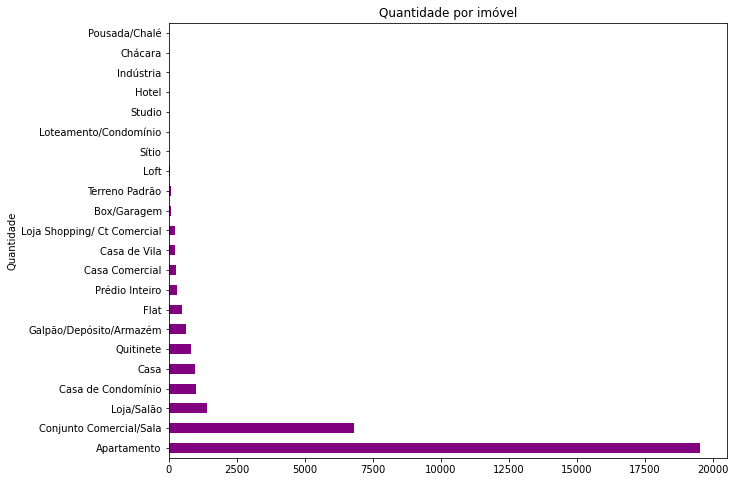

In [14]:
plt.rc('figure', figsize = (10,8))
fig = dados['Tipo'].value_counts().plot.barh(color ='purple', width = 0.5)
fig.set_ylabel('Quantidade')
fig.set_title('Quantidade por imóvel')

##Análise dos imóveis residenciais

Agora iremos focar nossas análises nos imóveis residenciais 


In [15]:
residencias = ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio','Casa de Vila']

In [16]:
selecao = dados['Tipo'].isin(residencias)

In [17]:
imoveis_residencias = dados[selecao]
imoveis_residencias.reset_index()

,index,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
22566,32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22567,32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22568,32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22569,32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Qual seria o total de imóveis desse tipo?

In [18]:
qnt_imoveis_residenciais = imoveis_residencias['Tipo'].value_counts().to_frame()
qnt_imoveis_residenciais.columns = ['Quantidade']
qnt_imoveis_residenciais

,Quantidade
Apartamento,19525
Casa de Condomínio,996
Casa,965
Quitinete,836
Casa de Vila,249


In [19]:
total_bairro = imoveis_residencias['Bairro'].unique().shape[0]
print(f'Existem -{total_bairro}- bairros com residencias')

Existem -154- bairros com residencias


In [20]:
imoveis_residencias['Bairro'].unique()

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Vista Alegre', 'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Praça Seca', 'Piedade', 'Lagoa', 'Catete',
       'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Rocha Miranda', 'Engenho Novo', 'Engenho de Dentro',
       'Cidade Nova', 'Pilares', 'Tomás Coelho', 'Água Santa',
       'São Cristóvão', 'Ilha do Governador', 'Jardim Sulacap',
       'Oswaldo Cruz', 'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque',
       'Vaz Lobo', 'Madureira', 'São Francisco Xavier', 'Pe

Para uma análise mais objetiva e uma visualização mais clara iremos fazer uma seleção entre os bairros para podermos analisar  

##Análise dos bairros com a maior quantidade de residências

In [21]:
imoveis_residencias['Bairro'].value_counts().head(10)


Barra da Tijuca             3921
Copacabana                  2759
Ipanema                     1800
Recreio dos Bandeirantes    1672
Leblon                      1277
Tijuca                      1113
Botafogo                     889
Flamengo                     723
Campo Grande                 533
Lagoa                        494
Name: Bairro, dtype: int64

In [22]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Recreio dos Banderantes', 'Leblon', 'Tijuca', 'Botafogo', 'Flamengo', 'Campo Grande', 'Lagoa']
slc = imoveis_residencias['Bairro'].isin(bairros)

In [23]:
imoveis_residencias = imoveis_residencias[slc]
imoveis_residencias.reset_index()

,index,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
2,13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
3,14,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0
4,15,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
...,...,...,...,...,...,...,...,...,...,...
13504,32947,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
13505,32949,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
13506,32950,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0
13507,32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0


In [24]:
grupo_bairro = imoveis_residencias.groupby('Bairro')

Qual seria a média dos valores dos aluguéis e dos condominios?

In [25]:
#Mostrando a média dos valores por bairro em ordem crescente 

grupo_bairro[['Valor', 'Condominio']].mean().round(2).sort_values('Valor')

,Valor,Condominio
Bairro,,
Campo Grande,1196.76,178.08
Tijuca,2042.19,703.38
Copacabana,4137.41,1100.80
Flamengo,4148.49,1088.43
Barra da Tijuca,7073.72,3537.89
Lagoa,8191.65,1980.90
Botafogo,8690.96,958.71
Leblon,8757.75,2075.83
Ipanema,9375.91,2199.55


Text(0.5, 1.0, 'Valor médio por aluguel por Bairro')

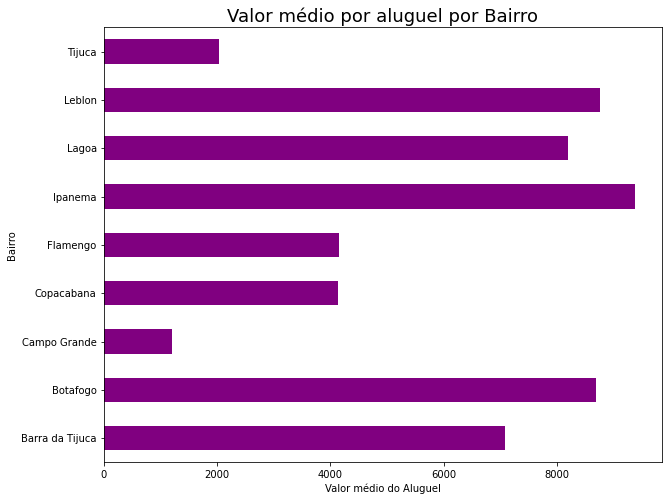

In [26]:
fig = grupo_bairro['Valor'].mean().plot.barh(color = 'purple')
fig.set_xlabel('Valor médio do Aluguel',{'fontsize':10})
fig.set_title('Valor médio por aluguel por Bairro',{'fontsize':18})

Podemos também olhar alguns dados estatísticos que são bem importantes para nossa análise como, media, mínimo, máximo, desvio padrão e entre outros

In [27]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3921.0,7073.72,11804.46,100.0,2500.0,4500.0,8500.0,600000.0
Botafogo,889.0,8690.96,150826.94,700.0,2200.0,3000.0,4350.0,4500000.0
Campo Grande,533.0,1196.76,1206.62,330.0,700.0,900.0,1300.0,12000.0
Copacabana,2759.0,4137.41,3596.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,723.0,4148.49,3862.76,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1800.0,9375.91,8224.56,1200.0,4500.0,7000.0,11000.0,90000.0
Lagoa,494.0,8191.65,6578.58,1800.0,4000.0,5500.0,9500.0,40000.0
Leblon,1277.0,8757.75,6986.57,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1113.0,2042.19,1655.30,750.0,1500.0,1800.0,2300.0,45000.0


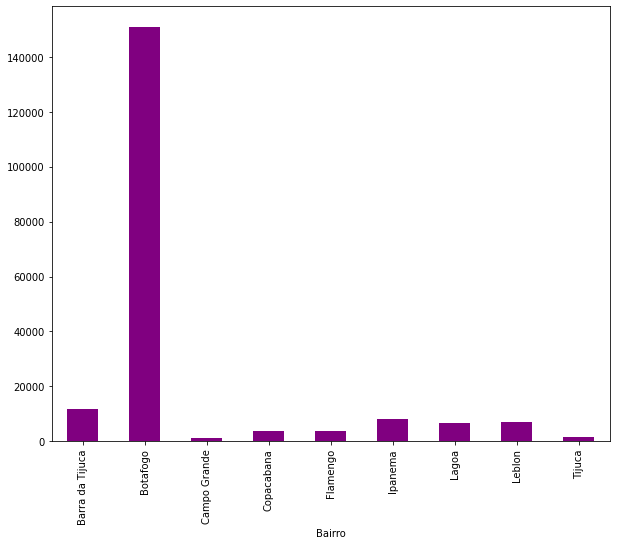

In [28]:
grupo_bairro['Valor'].std().plot.bar(color = 'purple')

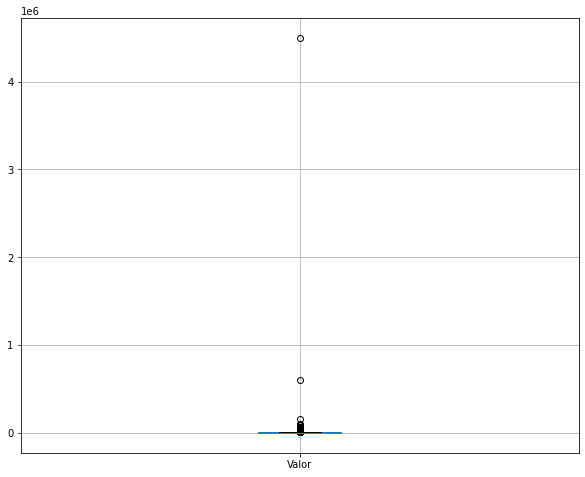

In [39]:
imoveis_residencias.boxplot(['Valor'])

Após essas 3 últimas análises podemos perceber um outlier que precisamos remover

In [30]:
imoveis_residencias[imoveis_residencias['Valor']>=500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
11712,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
23491,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0


Vamos fazer o cáculo dos quartis a fim de retirar os valores que fogem dos limites 

In [32]:
valor = imoveis_residencias['Valor']

In [33]:
# Q1 = Primeiro Quartil , Q3 = Terceiro Quartil e IIQ = Intervalo Interquartil
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [35]:
x = (valor >= limite_inferior) & (valor <= limite_superior)

#vamos criar um novo data frame para não modificar o original/
new_df = imoveis_residencias[x]

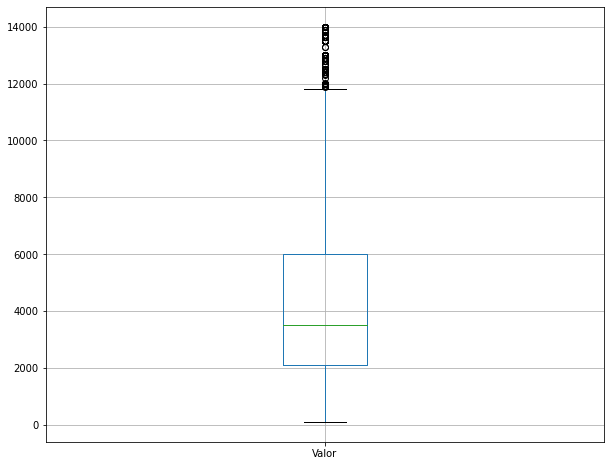

In [38]:
new_df.boxplot(['Valor'])

Vamos dar uma olhada também nos valores por tipos

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


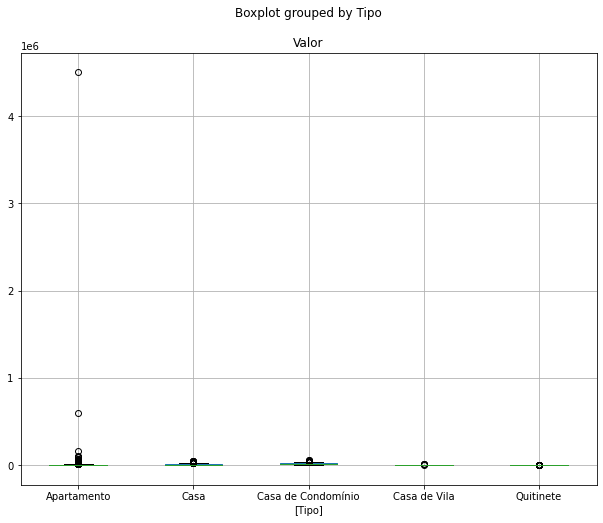

In [41]:
imoveis_residencias.boxplot(['Valor'], by=['Tipo'])

Vamos novamente retirar os outliers e os valores que fogem dos limites para uma melhor avaliação

In [47]:
grupo_tipo = imoveis_residencias.groupby('Tipo')['Valor']

In [51]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [52]:
#vamos criar um novo data frame com os valores limpos
dt_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = imoveis_residencias['Tipo'] == tipo
  eh_dentro_limite = (imoveis_residencias['Valor'] >= limite_inferior[tipo]) & (imoveis_residencias['Valor'] <= limite_superior[tipo])
  seletion = eh_tipo & eh_dentro_limite
  data_seletion = imoveis_residencias[seletion]
  dt_new = pd.concat([dt_new, data_seletion])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


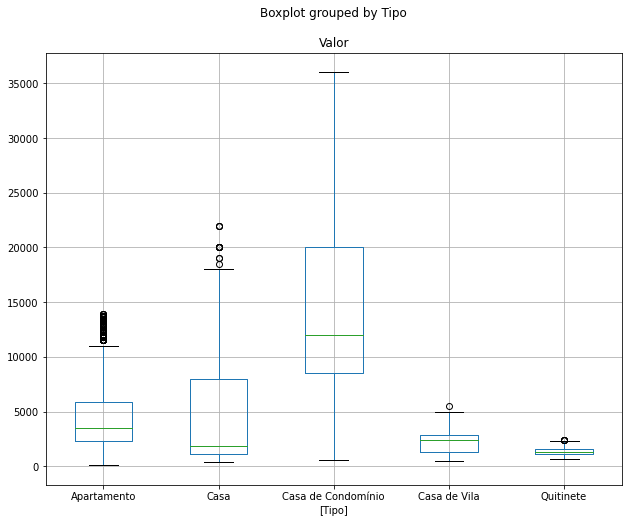

In [53]:
dt_new.boxplot(['Valor'], by=['Tipo'])

## **Conclusão:**
 - Através do arquivo citado anteriormente, foi possível identificar valores ausentes e outliers, fazer seus tratamentos, plotar alguns gráficos para uma melhor visualização e ao longo da análise conseguimos responder algumas perguntas 
  
 - Para uma melhor análise seria interessante a divisão dessa base de dados, seja por imóveis de alto e baixo padrão ou também por bairros da zona sul, oeste e afins.

 